In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search facebook/opt-350m, learning rate 1e-05


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	2.1581	Val Loss:	1.5404	Accuracy:	0.4083	F1:	0.2968
2 / 30: Train Loss:	1.4811	Val Loss:	1.4191	Accuracy:	0.4852	F1:	0.3792
3 / 30: Train Loss:	1.3293	Val Loss:	1.3933	Accuracy:	0.5355	F1:	0.4047
4 / 30: Train Loss:	1.3964	Val Loss:	1.4806	Accuracy:	0.4763	F1:	0.3853
5 / 30: Train Loss:	1.4175	Val Loss:	1.9418	Accuracy:	0.2663	F1:	0.2028
6 / 30: Train Loss:	2.1633	Val Loss:	2.2519	Accuracy:	0.1331	F1:	0.0649
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.67      0.49      0.57        67
               anecdote       0.58      0.84      0.69        43
         cherry picking       0.41      0.73      0.53        56
      conspiracy theory       0.52      0.59      0.55        39
           fake experts       0.00      0.00      0.00        12
           false choice       0.67      0.15      0.25        13
      false equivalence 

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	2.0843	Val Loss:	1.2716	Accuracy:	0.6036	F1:	0.4909
2 / 30: Train Loss:	1.0822	Val Loss:	1.4764	Accuracy:	0.5000	F1:	0.4872
3 / 30: Train Loss:	2.1750	Val Loss:	2.1432	Accuracy:	0.1272	F1:	0.0251
4 / 30: Train Loss:	2.0994	Val Loss:	2.0782	Accuracy:	0.1657	F1:	0.0316
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.67      0.60      0.63        67
               anecdote       0.69      0.88      0.78        43
         cherry picking       0.43      0.68      0.53        56
      conspiracy theory       0.79      0.67      0.72        39
           fake experts       0.00      0.00      0.00        12
           false choice       0.58      0.54      0.56        13
      false equivalence       0.00      0.00      0.00        14
impossible expectations       0.76      0.51      0.61        37
           single cause       0.55    

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	3.3102	Val Loss:	2.1207	Accuracy:	0.1982	F1:	0.0368
2 / 30: Train Loss:	2.1242	Val Loss:	2.0666	Accuracy:	0.1982	F1:	0.0368
3 / 30: Train Loss:	2.0970	Val Loss:	2.0673	Accuracy:	0.1982	F1:	0.0368
4 / 30: Train Loss:	2.0953	Val Loss:	2.0639	Accuracy:	0.1982	F1:	0.0368
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.20      1.00      0.33        67
               anecdote       0.00      0.00      0.00        43
         cherry picking       0.00      0.00      0.00        56
      conspiracy theory       0.00      0.00      0.00        39
           fake experts       0.00      0.00      0.00        12
           false choice       0.00      0.00      0.00        13
      false equivalence       0.00      0.00      0.00        14
impossible expectations       0.00      0.00      0.00        37
           single cause       0.00    

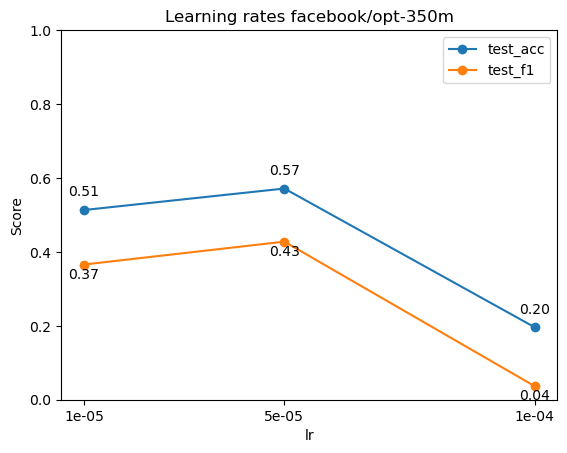

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=True)

In [6]:
%reset -f